In [4]:
! pip install selenium beautifulsoup4 pandas numpy requests lxml openpyxl

In [1]:
import os
print(os.getcwd())

c:\Users\dkreh\Desktop\KDT_RE_5th\3_Project\01_DataAnalysis\scripts\preprocessing


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv("data/policy/k_re100_companies_all.csv")

df['RE100 달성률'] = df['RE100 목표/달성률'].str.extract(r'\((\d+)%\)')[0].astype(int)

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


plt.figure(figsize=(12,6))
plt.bar(df['기업명'], df['RE100 달성률'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("국내기업 RE100 이행률 (2023년)")
plt.ylabel("이행률 (%)")
plt.tight_layout()

# 5. 그래프 출력
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data/policy/k_re100_companies_all.csv'

In [5]:
industry_avg = df.groupby("사업영역")["RE100 달성률"].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
industry_avg.plot(kind="bar", color="lightgreen")
plt.title("산업별 평균 RE100 달성률 (2023 기준)")
plt.ylabel("평균 달성률 (%)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

In [6]:
import matplotlib.pyplot as plt
import pandas as pd


join_counts = df['가입연도'].value_counts().sort_index()


years = range(join_counts.index.min(), join_counts.index.max()+1)

plt.figure(figsize=(12,6))
plt.bar(join_counts.index, join_counts.values, color="salmon", label="연도별 기업 수")

cumsum = join_counts.cumsum()
plt.plot(join_counts.index, cumsum, color="blue", marker="o", label="누적 기업 수")

plt.xticks(years, rotation=45)

plt.title("가입연도별 RE100 참여 기업 추세")
plt.xlabel("가입연도")
plt.ylabel("기업 수")
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'df' is not defined

C:\Users\dkreh\AppData\Local\Temp\ipykernel_7268\3028246084.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="재생에너지 사용률(%)", y="국가", data=df, palette=colors)


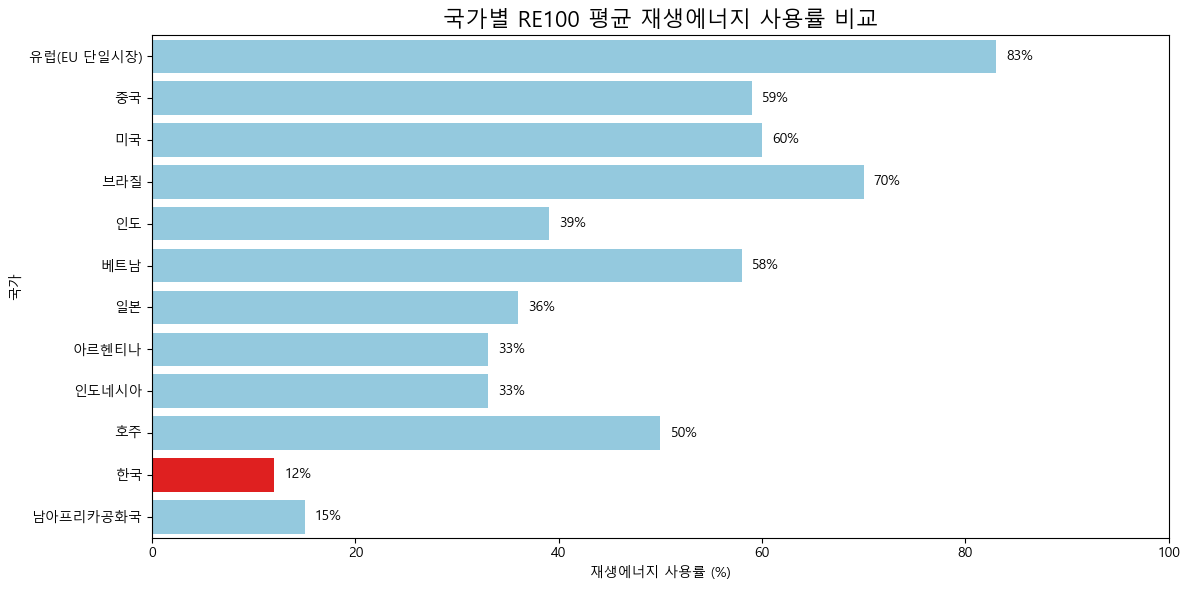

In [ ]:
# 해외 사례 비교
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


data = {
    "국가": [
        "유럽(EU 단일시장)", "중국", "미국", "브라질", "인도",
        "베트남", "일본", "아르헨티나", "인도네시아", "호주",
        "한국", "남아프리카공화국"
    ],
    "재생에너지 사용률(%)": [83, 59, 60, 70, 39, 58, 36, 33, 33, 50, 12, 15]
}

df = pd.DataFrame(data)

colors = [] # 추가 : 한국만 색 바꿈
for country in df["국가"]:
    if country == "한국":
        colors.append("red")
    else:
        colors.append("skyblue")


plt.figure(figsize=(12, 6))
sns.barplot(x="재생에너지 사용률(%)", y="국가", data=df, palette=colors)


for index, value in enumerate(df["재생에너지 사용률(%)"]):
    plt.text(value + 1, index, str(value) + "%", va='center')

plt.title("국가별 RE100 평균 재생에너지 사용률 비교", fontsize=16)
plt.xlabel("재생에너지 사용률 (%)")
plt.ylabel("국가")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


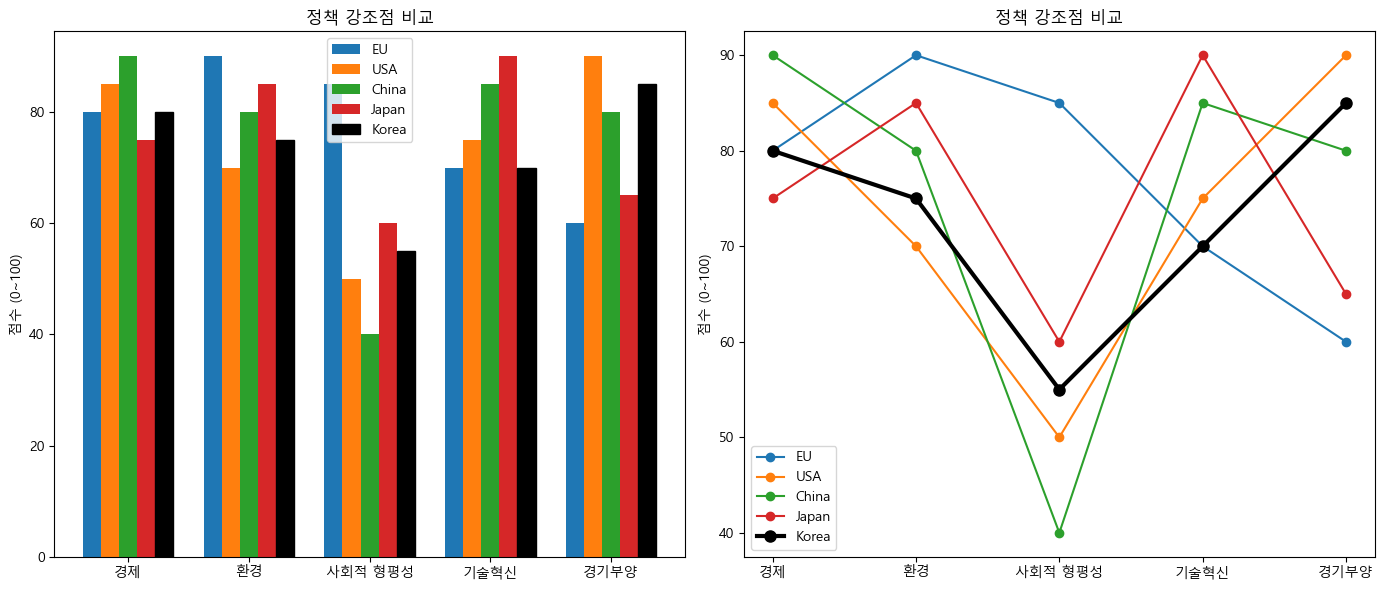

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# 지표와 데이터
labels = ['경제', '환경', '사회적 형평성', '기술혁신', '경기부양']
EU = [80, 90, 85, 70, 60]
USA = [85, 70, 50, 75, 90]
China = [90, 80, 40, 85, 80]
Japan = [75, 85, 60, 90, 65]
Korea = [80, 75, 55, 70, 85]

data = [EU, USA, China, Japan, Korea]
countries = ['EU', 'USA', 'China', 'Japan', 'Korea']

x = np.arange(len(labels))
width = 0.15                


fig, axes = plt.subplots(1, 2, figsize=(14,6))

for i, country in enumerate(countries):
    if country == 'Korea':
        axes[0].bar(x + i*width, data[i], width, label=country, color="#000000", edgecolor='black')
    else:
        axes[0].bar(x + i*width, data[i], width, label=country)

axes[0].set_xticks(x + width*2)
axes[0].set_xticklabels(labels)
axes[0].set_ylabel('점수 (0~100)')
axes[0].set_title('정책 강조점 비교')
axes[0].legend()


for i, country in enumerate(countries):
    if country == 'Korea':
        axes[1].plot(labels, data[i], marker='o', label=country,
                     color='#000000', linewidth=3, markersize=8)
    else:
        axes[1].plot(labels, data[i], marker='o', label=country)

axes[1].set_ylabel('점수 (0~100)')
axes[1].set_title('정책 강조점 비교')
axes[1].legend()

plt.tight_layout()
plt.show()

#-----------------------------
# 출처 한국 학술지 용인 색인
#-----------------------------

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


url = "https://www.keei.re.kr/board.es?mid=a20102000000&bid=0028&act=view&list_no=119352&cg_code=C01"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")


data = {
    "Year": [2025, 2030],
    "EU_Target_Reduction(%)": [55, 100], 
    "Korea_Target_Reduction(%)": [24.4, 40],
    "Korea_Contribution_GreenNewDeal(%)": [3.3, 10] 
}
df = pd.DataFrame(data)

# 3. 시각화
sns.set(style="whitegrid")
plt.figure(figsize=(8,6))
sns.barplot(x="Year", y="value", hue="variable",
            data=pd.melt(df, ["Year"], var_name="variable", value_name="value"))

plt.title("EU vs Korea Green New Deal GHG Reduction Contribution")
plt.ylabel("Reduction (%)")
plt.xlabel("Year")
plt.legend(title="Category")
plt.show()

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 현재 작업 디렉토리 확인
print("현재 작업 디렉토리:", os.getcwd())

# 절대경로로 파일 불러오기
df = pd.read_excel(r"C:/Users/dkreh/Desktop/KDT_RE_5th/3_Project/01_DataAnalysis/docs/강원도_지역별_재생에너지_발전량.xlsx", sheet_name="Sheet1")

print(df.head())

현재 작업 디렉토리: c:\Users\dkreh\Desktop\KDT_RE_5th\3_Project\01_DataAnalysis\scripts\preprocessing
     연도 광역지자체 기초지자체  신재생에너지 합계   재생에너지 합계  신에너지 합계  신재생에너지공급비중      태양광  \
0  2021    강원   강릉시  2,088,289  2,088,224       65       35.46  131,258   
1  2021    강원   고성군    142,575    142,575        -        2.42  141,704   
2  2021    강원    기타      4,429      4,403       26        0.08    2,769   
3  2021    강원   동해시    405,359    273,611  131,748        6.88   26,993   
4  2021    강원   삼척시    280,341    280,337        3        4.76  110,382   

       풍력      수력 해양        바이오 재생폐기물     연료전지 IGCC  
0  81,395   3,230  -  1,872,341     -       65    -  
1       -     871  -          -     -        -    -  
2   1,634       -  -          -     -       26    -  
3       -  30,284  -    216,335     -  131,748    -  
4  33,271  13,449  -    123,235     -        3    -  


In [ ]:
! pip install selenium beautifulsoup4 pandas numpy requests lxml openpyxl

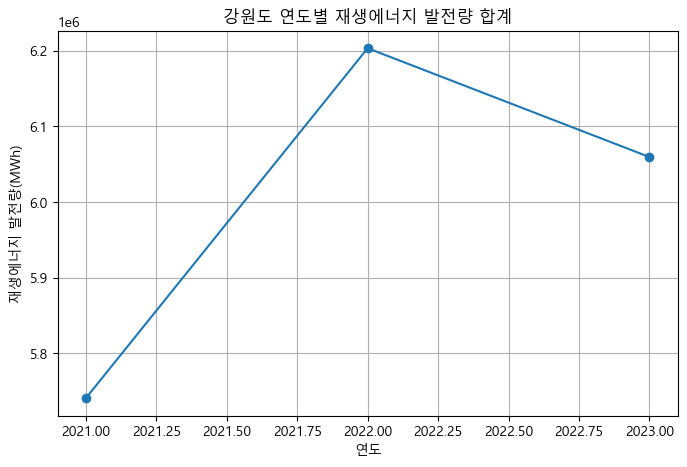

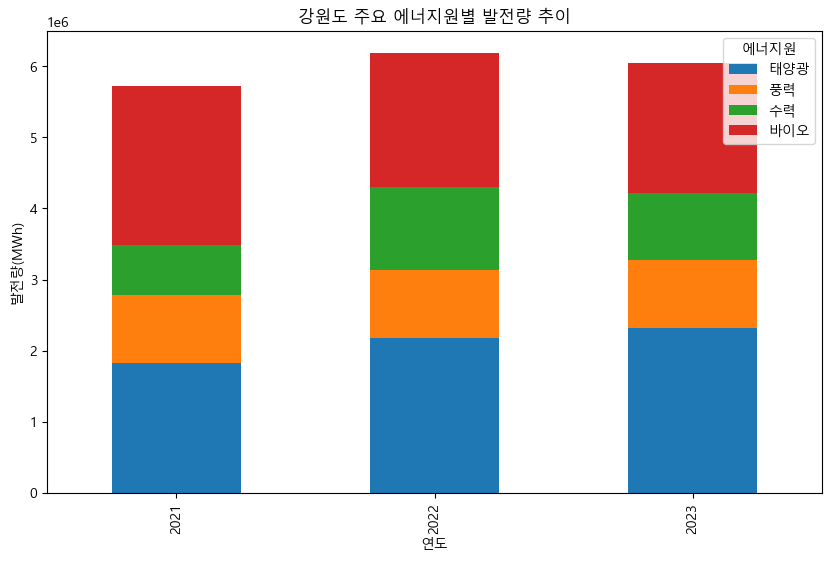

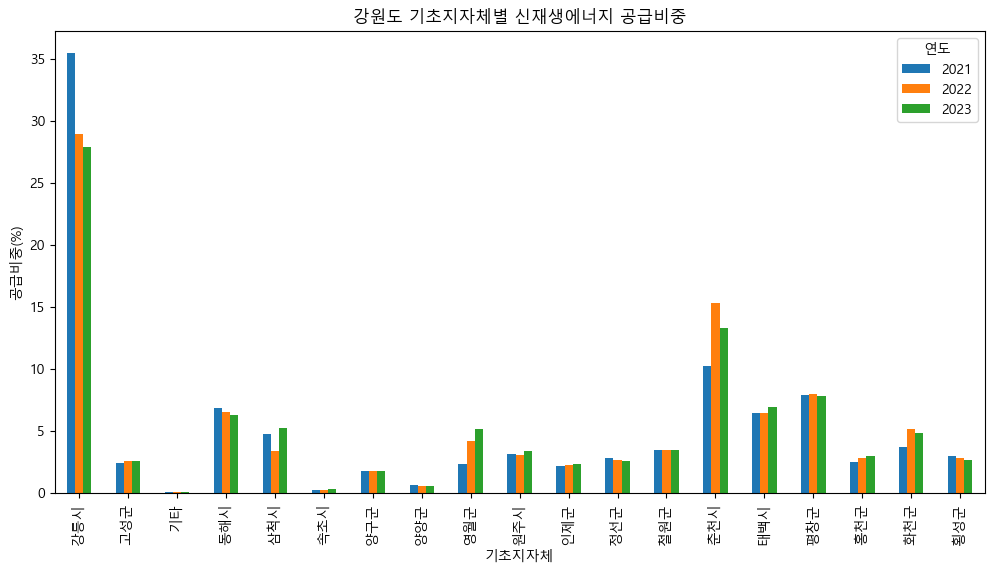

📊 강원도 연도별 재생에너지 발전량 합계(MWh):
2021년: 5,740,642 MWh
2022년: 6,203,410 MWh
2023년: 6,059,528 MWh


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False


df = pd.read_excel(
    r"C:/Users/dkreh/Desktop/KDT_RE_5th/3_Project/01_DataAnalysis/docs/강원도_지역별_재생에너지_발전량.xlsx",
    sheet_name="Sheet1"
)


df["연도"] = pd.to_numeric(df["연도"], errors="coerce")
df["재생에너지 합계"] = (
    df["재생에너지 합계"].astype(str)
    .str.replace(",", "")
    .str.replace("-", "0")
    .astype(float)
)

for col in ["태양광", "풍력", "수력", "바이오"]:
    df[col] = (
        df[col].astype(str)
        .str.replace(",", "")
        .str.replace("-", "0")
        .astype(float)
    )


yearly_sum = df.groupby("연도")["재생에너지 합계"].sum()

plt.figure(figsize=(8,5))
plt.plot(yearly_sum.index, yearly_sum.values, marker="o")
plt.title("강원도 연도별 재생에너지 발전량 합계")
plt.xlabel("연도")
plt.ylabel("재생에너지 발전량(MWh)")
plt.grid(True)
plt.show()


energy_sources = ["태양광", "풍력", "수력", "바이오"]
yearly_sources = df.groupby("연도")[energy_sources].sum()

yearly_sources.plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("강원도 주요 에너지원별 발전량 추이")
plt.xlabel("연도")
plt.ylabel("발전량(MWh)")
plt.legend(title="에너지원")
plt.show()


pivot_ratio = df.pivot_table(index="기초지자체", columns="연도", values="신재생에너지공급비중")

pivot_ratio.plot(kind="bar", figsize=(12,6))
plt.title("강원도 기초지자체별 신재생에너지 공급비중")
plt.xlabel("기초지자체")
plt.ylabel("공급비중(%)")
plt.legend(title="연도")
plt.show()

print("📊 강원도 연도별 재생에너지 발전량 합계(MWh):")
for year, value in yearly_sum.items():
    print(f"{year}년: {value:,.0f} MWh")